### Directing Customers to Subsctiption Through Financial App Behavior

## Goal of the project:

The 'FinTech' company launch there android and iOS mobile base app and want to grow there business.But
there is a problem how to recomended this app and offer who realy want to use it. So for that company 
desided to give free trial to each and every customer for 24 hour and collect data from the customers.
In this senariao some customer purchase the app and someone not. According to this data company want 
to give special offer to the customer who are not interested to buy without offer and grow there 
business.


This is a classification problem

### import essential libraries...................................

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil import parser

### import datasets & explore

In [2]:
app = pd.read_csv('D:\\Courses\Data Science\A = DATA SCIENCE FULL PROJECTS\Financial App Behavior Analysis\\FineTech_appData.csv')
app.shape

(50000, 12)

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
app.head()

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1

In [4]:
for i in [1,2,3,4,5]:
    print(app.loc[i,'screen_list'],'\n')


joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [5]:
app.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 3.8+ MB


In [7]:
app.describe()

user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000  
25%                0.000000      0.000000      0.000000  
50%                0.000000      1.000000      0.000000  
75%                0.000000      1.000000      0.000000  
max                1.000000      1.000000      1.000000

In [8]:
for i in app.columns:
    print(f"unique value of {i}\n{app[i].unique()}\nlen of unique value: {len(app[i].unique())}\n\n")

unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len of unique value: 49874


unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len of unique value: 49747


unique value of dayofweek
[3 6 1 4 2 0 5]
len of unique value: 7


unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len of unique value: 24


unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74

In [9]:
app.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [10]:
# we can use sliceing method
# hour column convert into a integer no.

# define
app['hour'] = app.hour.str.slice(1,3).astype(int)

In [11]:
app.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
cat_var = app.select_dtypes(include=['O']).keys()
app2 = app.drop(columns=cat_var)
app2.drop(columns=['user'],inplace=True)

app2.head()

dayofweek  hour  age  numscreens  minigame  used_premium_feature  enrolled  \
0          3     2   23          15         0                     0         0   
1          6     1   24          13         0                     0         0   
2          1    19   23           3         0                     1         0   
3          4    16   28          40         0                     0         1   
4          1    18   31          32         0                     0         1   

   liked  
0      0  
1      0  
2      1  
3      0  
4      1

## Data Visualization

### Heatmap Using Correlation Matrix

Text(0.5, 1.0, 'Heatmap using correlation Matrix of app2')

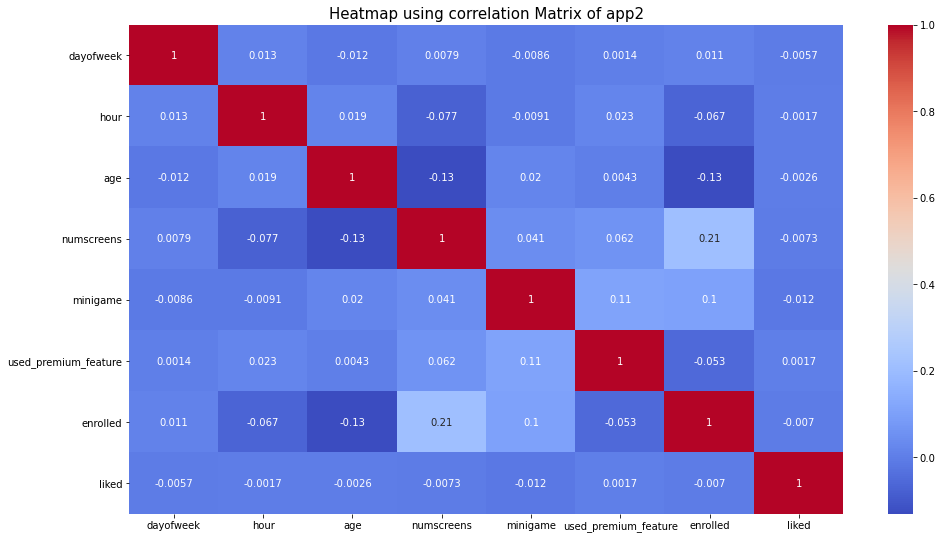

In [13]:
plt.figure(figsize=(16,9))

sns.heatmap(app2.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap using correlation Matrix of app2',fontdict={'fontsize':15})

### Pairplot of app2

In [14]:
# pairplot of numeric data
# sns.pairplot(data =app2,hue='enrolled')

### countplot of enrolled

c:\program files\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

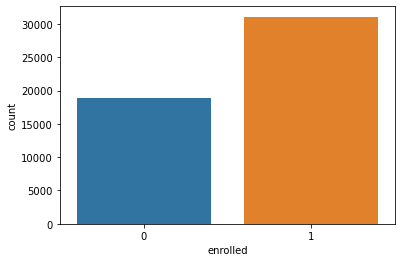

In [15]:
# count enrolled features
sns.countplot(app2.enrolled)

In [16]:
# value of 'enrolled' or 'not enrolled' features
# print('enrolled : ',(app.enrolled<1).sum(),', not enrolled : ',(50000-(app.enrolled<1).sum()))
# or
print('Enrolled Features : {} ,out of 50000\nNot Enrolled Features : {} ,out of 50000'.format(app['enrolled'].sum(),50000-app['enrolled'].sum()))

Enrolled Features : 31074 ,out of 50000
Not Enrolled Features : 18926 ,out of 50000


### Histogram of each Features of numercal dataset

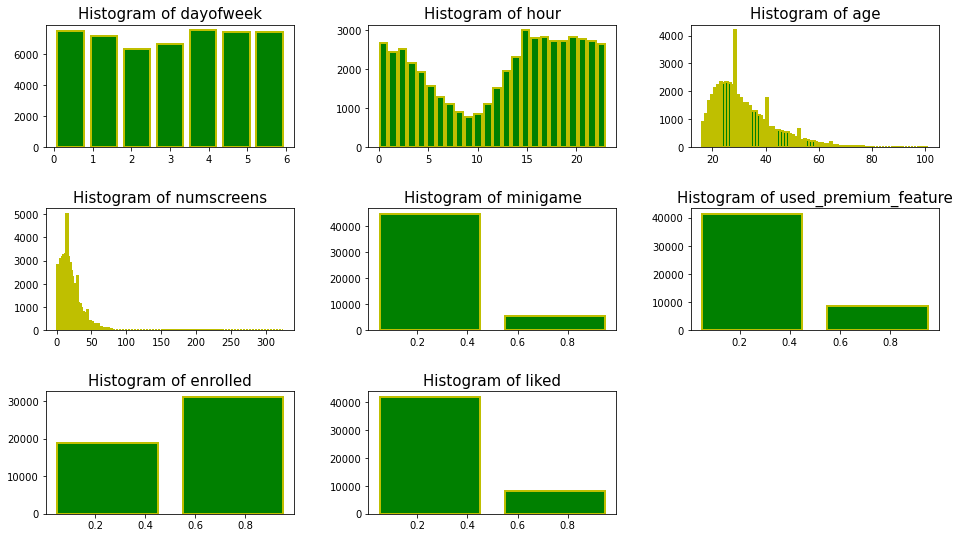

In [17]:
# histogram
plt.figure(figsize=(16,9))
features = app2.columns
for i,f in enumerate(features):
    plt.subplot(3,3,i+1)
    plt.title('Histogram of {}'.format(f),fontsize=15)  #title of histogram
    bins=len(app[f].unique())  # get unique value for x-axis
    plt.hist(app[f],bins=bins,color='g',rwidth=0.8,edgecolor='y',linewidth=2)# Histogram method
    
plt.subplots_adjust(wspace=0.3,hspace=0.5) # adjuct a spaceing between plotting

### Correlation barplot with 'enrolled' Feature

c:\program files\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


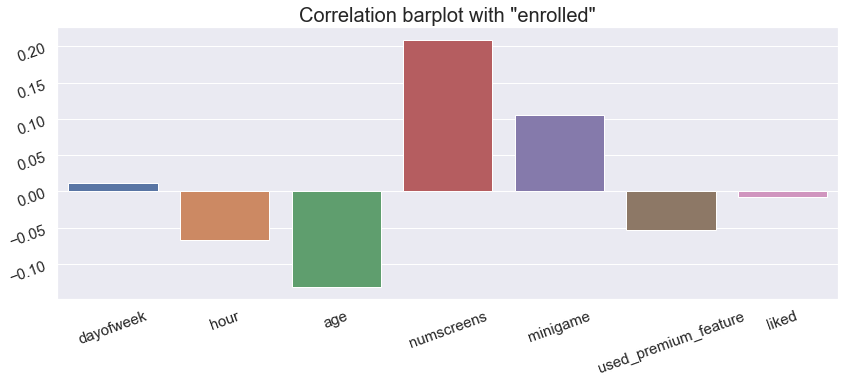

In [18]:
sns.set()  # for dark grid background
plt.figure(figsize=(14,5))
plt.title('Correlation barplot with "enrolled"',fontsize=20)
x = app2.drop(columns=['enrolled'])
y = x.corrwith(app2['enrolled'])
ax = sns.barplot(x.columns,y)

ax.tick_params(labelsize=15,labelrotation=20,color='g')  # decorate x,y

In [19]:
# convert obj data into a datetime format 
app['first_open']    = [parser.parse(i) for i in app['first_open']]
app['enrolled_date'] = [parser.parse(i) if isinstance(i,str) else i for i in app['enrolled_date']]

In [20]:
app.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

### creating a new Feature which time enrolled the user

In [21]:
app.head(5)

user              first_open  dayofweek  hour  age  \
0  235136 2012-12-27 02:14:51.273          3     2   23   
1  333588 2012-12-02 01:16:00.905          6     1   24   
2  254414 2013-03-19 19:19:09.157          1    19   23   
3  234192 2013-07-05 16:08:46.354          4    16   28   
4   51549 2013-02-26 18:50:48.661          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled           enrolled_date  liked  
0                     0         0                     NaT      0  
1                     0         0                     NaT      0  
2                     1         0                     NaT      1  
3                     0         1 2013-07-05 16:11:49.513      0  
4                     0         1 2013-02-26 18:56:37.841      1

In [22]:
app['time_to_enrolled']=(app.enrolled_date-app.first_open).astype('timedelta64[h]')
app.head(2)

user              first_open  dayofweek  hour  age  \
0  235136 2012-12-27 02:14:51.273          3     2   23   
1  333588 2012-12-02 01:16:00.905          6     1   24   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   

   used_premium_feature  enrolled enrolled_date  liked  time_to_enrolled  
0                     0         0           NaT      0               NaN  
1                     0         0           NaT      0               NaN

(array([20885.,   625.,   337.,   207.,   159.,   129.,   133.,   109.,
          108.,   101.,    91.,    84.,    73.,    76.,    68.,    72.,
           73.,    85.,    69.,    64.,    76.,    67.,   172.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <BarContainer object of 23 artists>)

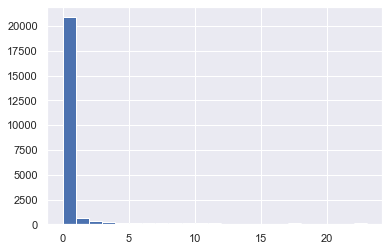

In [23]:
# plotting a histogram
plt.hist(app['time_to_enrolled'].dropna(),range(0,24))

In [24]:
app.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
time_to_enrolled               float64
dtype: object

In [25]:
# drop the datetime series and prepare for ML

app.drop(columns=['first_open','enrolled_date','time_to_enrolled'],inplace=True)
app.head()

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled  liked  
0                     0         0      0  
1                     0         0      0  
2                     1         0      1  
3                     0         1      0  
4                     0         1      1

###### screen_list

In [26]:
# scr = []
# for i in range(len(app['screen_list'])):
#     for j in range(len(app['screen_list'][i].split(','))):
#         if app['screen_list'][i].split(',')[j] not in scr:
#             scr.append(app['screen_list'][i].split(',')[j])

# scr

In [27]:
scr_data = pd.read_csv('D:\\Courses\Data Science\A = DATA SCIENCE FULL PROJECTS\Financial App Behavior Analysis\\top_screens.csv').top_screens.values
scr_data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [28]:
# change screen_list into str
app['screen_list'] = app.screen_list.astype(str)+','

In [29]:
app.head()

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                 Splash,Cycle,Loan,           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled  liked  
0                     0         0      0  
1                     0         0      0  
2                     1         0      1  
3                     0         1      0  
4                     0         1      1

In [30]:
# convert value into a Number

for scr_name in scr_data:
    app[scr_name] = app.screen_list.str.contains(scr_name).astype(int)
    app['screen_list'] = app.screen_list.str.replace(scr_name+",","")

In [31]:
# test
app.screen_list.str.contains('splash').astype(int)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [32]:
# test
app.screen_list.str.replace('splace'+',',"")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
5        Home,ScanPreview,VerifySSN,product_review,prod...
6              product_review,product_review2,ScanPreview,
7        Home,product_review,product_review2,ScanPrevie...
8        product_review,product_review2,ScanPreview,Ver...
9        Home,product_review,product_review,product_rev...
10            Home,Settings,product_review,product_review,
11       product_review,Home,SelectInstitution,product_...
12       joinscreen,product_review,product_review2,Scan...
13                                                   Home,
14       joinscreen,product_review,product_review2,Scan...
15       joinscreen,product_review,product_review2,Veri...
16       product_review,product_review,product_review,p.

In [33]:
app.shape

(50000, 68)

In [34]:
app.head()

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   

                                         screen_list  numscreens  minigame  \
0  joinscreen,product_review,ScanPreview,VerifyTo...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                                              3         0   
3  product_review,Home,product_review,ReferralCon...          40         0   
4  joinscreen,ScanPreview,VerifySSN,Home,SelectIn...          32         0   

   used_premium_feature  enrolled  liked  Loan2  location  Institutions  \
0                     0         0      0      1         0             0   
1                     0         0      0      1         1             1   
2                     1         0      1      0         0             0   
3                     0         1      0      0         1             0   
4                     0         1      1      1         0             1   

   Credit3Container  VerifyPhone  BankVerification  VerifyDateOfBirth  \
0                 0            1                 0                  1   
1                 0            1                 0                  1   
2                 0            0                 0                  0   
3                 0            1                 0                  1   
4                 1            1                 1                  0   

   ProfilePage  VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  \
0            0              0      1         1                 0      0   
1            0              1      0         0                 0      0   
2            0              0      1         0                 0      0   
3            0              0      0         0                 0      1   
4            0              1      1         1                 0      0   

   CC1Category  Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  \
0            0       0     0    0                 0        0        0   
1            0       0     0    0                 0        0        0   
2            0       1     1    0                 0        0        0   
3            0       0     0    0                 0        1        1   
4            0       0     0    0                 0        0        1   

   EditProfile  Credit2  Finances  CC3  Saving9  Saving1  Alerts  Saving8  \
0            0        0         0    0        0        0       0        0   
1            0        0         0    0        0        0       0        0   
2            0        0         0    0        0        0       0        0   
3            0        1         1    0        0        0       0        0   
4            0        0         0    0        0        0       0        0   

   Saving10  Leaderboard  Saving4  VerifyMobile  VerifyHousing  RewardDetail  \
0         0            0        0             0              0             0   
1         0            0        0             0              0             0   
2         0            0        0             0              0             0   
3         0            1        0             0              0             1   
4         0            0        0             0              0             0   

   VerifyHousingAmount  ProfileMaritalStatus  ProfileChildren   \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   ProfileEducation  Saving7  ProfileEducationMajor  Rewards  AccountView  \
0                 0        0                      0        0            0   
1                 0        0                      

In [35]:
# remain screen in screen_list
app.loc[0,['screen_list']]

screen_list    joinscreen,product_review,ScanPreview,VerifyTo...
Name: 0, dtype: object

In [36]:
app.screen_list.str.count(',').head()

0     7
1     5
2     0
3     6
4    10
Name: screen_list, dtype: int64

In [37]:
# creat a new column for counted numbers in remain_screen_list
app['remain_screen_list'] = app.screen_list.str.count(',')

In [38]:
app.drop(columns=['screen_list'],inplace=True)

In [39]:
app.head(10)

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   
5   56480          2     9   20          14         0                     0   
6  144649          1     2   35           3         0                     0   
7  249366          1     3   26          41         0                     1   
8  372004          2    14   29          33         1                     1   
9  338013          4    18   26          19         0                     0   

   enrolled  liked  Loan2  location  Institutions  Credit3Container  \
0         0      0      1         0             0                 0   
1         0      0      1         1             1                 0   
2         0      1      0         0             0                 0   
3         1      0      0         1             0                 0   
4         1      1      1         0             1                 1   
5         1      0      1         0             1                 0   
6         0      0      0         0             0                 0   
7         0      0      1         0             0                 1   
8         1      0      1         1             1                 0   
9         1      0      1         1             0                 0   

   VerifyPhone  BankVerification  VerifyDateOfBirth  ProfilePage  \
0            1                 0                  1            0   
1            1                 0                  1            0   
2            0                 0                  0            0   
3            1                 0                  1            0   
4            1                 1                  0            0   
5            1                 0                  0            0   
6            0                 0                  0            0   
7            1                 1                  0            0   
8            1                 1                  0            0   
9            1                 1                  1            0   

   VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  CC1Category  \
0              0      1         1                 0      0            0   
1              1      0         0                 0      0            0   
2              0      1         0                 0      0            0   
3              0      0         0                 0      1            0   
4              1      1         1                 0      0            0   
5              0      1         1                 1      0            0   
6              0      0         0                 0      0            0   
7              1      1         0                 1      0            0   
8              1      0         0                 0      0            0   
9              1      0         0                 0      0            0   

   Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  EditProfile  \
0       0     0    0                 0        0        0            0   
1       0     0    0                 0        0        0            0   
2       1     1    0                 0        0        0            0   
3       0     0    0                 0        1        1            0   
4       0     0    0                 0        0        1            0   
5       0     0    0                 0        0        1            0   
6       0     0    0                 0        0        0            0   
7       1     0    0                 0        0        0            0   
8       0     1    0                 1        0        0            0   
9       0     0    0                 0        0 

In [40]:
# Total columns
app.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [41]:
#  Take sum of all saving screen in one place
saving_scr=['Saving1','Saving2','Saving2Amount','Saving4',
            'Saving5','Saving6','Saving7','Saving8',
            'Saving9','Saving10']

app['saving_scr_count'] = app[saving_scr].sum(axis=1)
app.drop(columns=saving_scr,inplace=True)

In [42]:
credit_scr = [
    'Credit1',
    'Credit2',
    'Credit3',
    'Credit3Container',
    'Credit3Dashboard'
]


app['credit_scr_count'] = app[credit_scr].sum(axis=1)
app.drop(columns=credit_scr,inplace=True)

In [43]:
cc_scr = [
    'CC1',
    'CC1Category',
    'CC3'
]

app['cc_scr_count'] = app[cc_scr].sum(axis=1)
app.drop(columns=cc_scr,inplace=True)

In [44]:
loan_scr = [
    'Loan',
    'Loan2',
    'Loan3',
    'Loan4'
]
app['loan_scr_count'] = app[loan_scr].sum(axis=1)
app.drop(columns=loan_scr,inplace=True)

In [45]:
app.shape
app.head()

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   

   enrolled  liked  location  Institutions  VerifyPhone  BankVerification  \
0         0      0         0             0            1                 0   
1         0      0         1             1            1                 0   
2         0      1         0             0            0                 0   
3         1      0         1             0            1                 0   
4         1      1         0             1            1                 1   

   VerifyDateOfBirth  ProfilePage  VerifyCountry  Cycle  idscreen  Splash  \
0                  1            0              0      1         1       0   
1                  1            0              1      0         0       0   
2                  0            0              0      1         0       1   
3                  1            0              0      0         0       0   
4                  0            0              1      1         1       0   

   RewardsContainer  EditProfile  Finances  Alerts  Leaderboard  VerifyMobile  \
0                 0            0         0       0            0             0   
1                 0            0         0       0            0             0   
2                 0            0         0       0            0             0   
3                 0            0         1       0            1             0   
4                 0            0         0       0            0             0   

   VerifyHousing  RewardDetail  VerifyHousingAmount  ProfileMaritalStatus  \
0              0             0                    0                     0   
1              0             0                    0                     0   
2              0             0                    0                     0   
3              0             1                    0                     0   
4              0             0                    0                     0   

   ProfileChildren   ProfileEducation  ProfileEducationMajor  Rewards  \
0                 0                 0                      0        0   
1                 0                 0                      0        0   
2                 0                 0                      0        0   
3                 0                 0                      0        1   
4                 0                 0                      0        0   

   AccountView  VerifyAnnualIncome  VerifyIncomeType  ProfileJobTitle  Login  \
0            0                   0                 0                0      1   
1            0                   0                 0                0      0   
2            0                   0                 0                0      0   
3            0                   0                 0                0      0   
4            0                   0                 0                0      0   

   ProfileEmploymentLength  WebView  SecurityModal  ResendToken  \
0                        0        0              0            0   
1                        0        0              0            0   
2                        0        0              0            0   
3                        0        0              0            0   
4                        0        0              0            0   

   TransactionList  NetworkFailure  ListPicker  remain_screen_list  \
0                0               0           0                   7   
1                0               0           0                   5   
2                0               0           0                   0   
3                0               0           0     

In [46]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [47]:
app.describe()

user     dayofweek          hour          age    numscreens  \
count   50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean   186889.729900      3.029860     12.557220     31.72436     21.095900   
std    107768.520361      2.031997      7.438072     10.80331     15.728812   
min        13.000000      0.000000      0.000000     16.00000      1.000000   
25%     93526.750000      1.000000      5.000000     24.00000     10.000000   
50%    187193.500000      3.000000     14.000000     29.00000     18.000000   
75%    279984.250000      5.000000     19.000000     37.00000     28.000000   
max    373662.000000      6.000000     23.000000    101.00000    325.000000   

           minigame  used_premium_feature      enrolled         liked  \
count  50000.000000          50000.000000  50000.000000  50000.000000   
mean       0.107820              0.172020      0.621480      0.165000   
std        0.310156              0.377402      0.485023      0.371184   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      1.000000      0.000000   
75%        0.000000              0.000000      1.000000      0.000000   
max        1.000000              1.000000      1.000000      1.000000   

           location  Institutions   VerifyPhone  BankVerification  \
count  50000.000000  50000.000000  50000.000000      50000.000000   
mean       0.517760      0.293660      0.524600          0.319540   
std        0.499689      0.455443      0.499399          0.466303   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        1.000000      0.000000      1.000000          0.000000   
75%        1.000000      1.000000      1.000000          1.000000   
max        1.000000      1.000000      1.000000          1.000000   

       VerifyDateOfBirth   ProfilePage  VerifyCountry         Cycle  \
count       50000.000000  50000.000000   50000.000000  50000.000000   
mean            0.473480      0.158040       0.423160      0.364860   
std             0.499301      0.364782       0.494065      0.481396   
min             0.000000      0.000000       0.000000      0.000000   
25%             0.000000      0.000000       0.000000      0.000000   
50%             0.000000      0.000000       0.000000      0.000000   
75%             1.000000      0.000000       1.000000      1.000000   
max             1.000000      1.000000       1.000000      1.000000   

           idscreen        Splash  RewardsContainer   EditProfile  \
count  50000.000000  50000.000000      50000.000000  50000.000000   
mean       0.340700      0.200760          0.084000      0.048980   
std        0.473949      0.400573          0.277391      0.215828   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        1.000000      0.000000          0.000000      0.000000   
max        1.000000      1.000000          1.000000      1.000000   

           Finances        Alerts   Leaderboard  VerifyMobile  VerifyHousing  \
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000   
mean       0.076540      0.073720      0.051520      0.053860       0.045080   
std        0.265863      0.261317      0.221058      0.225743       0.207482   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%        0.000000      0.000000      0.000000      0.000000       0.000000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

       RewardDetail  VerifyHousingAmount 

### heatmap with correlation matrix new data

In [ ]:
plt.figure(figsize=(25,17))
sns.heatmap(app.corr(),annot=True,linewidth=2)
plt.title('Heatmap with Correlation of new Data',fontsize=15)

Text(0.5, 1.0, 'Heatmap with Correlation of new Data')

In [ ]:
app['ProfileChildren '].unique()

In [ ]:
corr_matrix = app.corr()
corr_matrix['ProfileChildren ']

In [ ]:
app['ProfileChildren ']

## Data Preprocessing

### split dataset in Train or Test

In [ ]:

train = app
xtrain = train.drop(columns=['enrolled'])
ytrain = train['enrolled']
xtrain.shape ,ytrain.shape

In [ ]:
# take and drop user id
train_userID  = train.drop(columns=['user'])
train.drop(columns=['user'],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(xtrain,ytrain,test_size=0.2,random_state=51)

print('x_train :{} , y_train :{}\nx_test :{} , y_test :{}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train_sc  = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

## Model Building

In [ ]:
# this is a classification problem so
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error

## Decision Tree

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)

accuracy_score(y_test,y_pred_dt)

In [ ]:
#  Train with Standard Scaling dataset
dt_model2 = DecisionTreeClassifier(max_depth=9)
dt_model2.fit(x_train_sc,y_train)
y_pred_dt2 = dt_model2.predict(x_test_sc)

accuracy_score(y_test,y_pred_dt2)

In [ ]:
# find error
# mse = mean_squared_error(y_test,y_pred_dt2)
# rmse = np.sqrt(mse)
# print('MSE : {}\nRMSE :{}'.format(mse,rmse))

## **K-NN**





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)

accuracy_score(y_test,y_pred_knn)

In [ ]:
 # Train with Standard Scaling DataSet
knn_model2 = KNeighborsClassifier()
knn_model2.fit(x_train_sc,y_train)
y_pred_knn2 = knn_model2.predict(x_test_sc)

accuracy_score(y_test,y_pred_knn2)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

accuracy_score(y_test,y_pred_nb)

In [ ]:
# Train with Standard Scaler
nb2 = GaussianNB()
nb2.fit(x_train_sc,y_train)
y_pred_nb2 = nb2.predict(x_test_sc)

accuracy_score(y_test,y_pred_nb2)

## Random Forest Classifier

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

accuracy_score(y_test,y_pred_rfc)

In [ ]:
# train with Standard Scaler Dataset
rfc2 = RandomForestClassifier()
rfc2.fit(x_train_sc,y_train)
y_pred_rfc2 = rfc2.predict(x_test_sc)

accuracy_score(y_test,y_pred_rfc2)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

accuracy_score(y_test,y_pred_lr)

In [ ]:
# Train with Standard Scaler
lr2 = LogisticRegression()
lr2.fit(x_train_sc,y_train)
y_pred_lr2 = lr2.predict(x_test_sc)

accuracy_score(y_test,y_pred_lr2)

## Support Vector Machine (support vector classifier)

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc  = svc.predict(x_test)

accuracy_score(y_test,y_pred_svc)

In [ ]:
# Train with Standard Scaler
svc2 = SVC()
svc2.fit(x_train_sc,y_train)
y_pred_svc2 = svc2.predict(x_test_sc)

accuracy_score(y_test,y_pred_svc2)

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)

accuracy_score(y_test,y_pred_xgb)

In [ ]:
# Train with Standerd Scaler
xgb_model2 = XGBClassifier(max_depth=4)
xgb_model2.fit(x_train_sc,y_train)
y_pred_xgb2 = xgb_model2.predict(x_test_sc)

accuracy_score(y_test,y_pred_xgb2)

In [ ]:
# XGBClassifier with parameter tuning
xgb_model_pt = XGBClassifier(
    learning_rate=0.01,
    n_estimators=5000,
    max_depth =4,
    min_child_weight=6,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

xgb_model_pt.fit(x_train,y_train)
y_pred_xgb_pt = xgb_model_pt.predict(x_test)

accuracy_score(y_test,y_pred_xgb_pt)

In [ ]:
# Train with Stander Scaler 
xgb_model_pt2 = XGBClassifier(
    learning_rate=0.01,
    n_estimators=5000,
    max_depth =4,
    min_child_weight=6,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

xgb_model_pt2.fit(x_train_sc,y_train)
y_pred_xgb_pt2 = xgb_model_pt2.predict(x_test_sc)

accuracy_score(y_test,y_pred_xgb_pt2)

### Confusion Metrix

In [ ]:
cm_xgb_pt2 = confusion_matrix(y_test,y_pred_xgb_pt2)
print(cm_xgb_pt2)
sns.heatmap(cm_xgb_pt2,annot=True,fmt='g')
plt.title('Confusion Matrix',fontsize=20)


### Classification Report

In [ ]:
cr_xgb_pt2 = classification_report(y_test,y_pred_xgb_pt2)
print('Classification Report >>>>:\n  ',cr_xgb_pt2)

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator=xgb_model_pt2,X=x_train_sc,y=y_train,cv=10)

print('Cross validation of XGBoost Model : {}'.format(cross_validation))
print('Cross validation of XGBoost Model (in mean) : {}'.format(cross_validation.mean()))

### Mapping predicted output to the target

In [ ]:
 app_result = pd.concat([train_userID,y_test])
 app_result['y_predict_result'] = y_pred_xgb_pt2

 app_result

### Save The Model using pickle

In [ ]:
import pickle

# dump into a file
pickle.dump(xgb_model_pt2,open('FineTech_app_ML_model.pickle','wb'))

In [ ]:
# Load FineTech app ML model
fineTech_app = pickle.load('FineTech_app_ML_model.pickle','rb')

# and predict the output but he tekes the Feature Scaled data                    *****important*****
y_predict = fineTech_app(x_test_sc)

# confusion matrix
cm = confusion_matrix(y_test,y_predict)
print('confusion matrix :\n',cm)

# accuracy
ac = accuracy_score(y_test,y_predict)
print('\n\nAccuracy Score :\n{}'.format(ac))

In [ ]:
# Save the model Using sklearn.externals import joblib
# from sklearn.externals import joblib
import joblib

# dump into a file
joblib.dump(xgb_model_pt2,'FineTech_app_ML_model2.joblib')

# Load FineTech app ML model
fineTech_app2 = joblib.load('FineTech_app_ML_model2.joblib')

# and predict the output but he tekes the Feature Scaled data                    *****important*****
y_predict2 = fineTech_app2(x_test_sc)

# confusion matrix
cm2 = confusion_matrix(y_test,y_predict)
print('confusion matrix :\n',cm2)

# accuracy
ac2 = accuracy_score(y_test,y_predict)
print('\n\nAccuracy Score :\n{}'.format(ac2))

# End of the Project